# Prediction of Insurance Amount

### Life cycle of this ML project

- Understanding the problem statement
- Data Collection
- Data cleaning
- Exploratory Data Analysis (EDA)
- Data Pre-processing
- Model and Metric Selection 
- Model Training and Evaluation
- Selection of the Best Model

## 1. Problem Statement

<p>This project aims to develop a machine learning model to predict insurance premiums based on individual characteristics. Key features include age, sex, BMI, number of children, smoking habits, and region of origin. By accurately predicting insurance amounts, the model can assist insurance companies in setting fair premiums and help customers understand their potential costs. The primary objective is to enhance the accuracy and reliability of premium predictions using these demographic and lifestyle factors.</p>

## 2. Data Collection

- The data used in this project have been obtained from the <a href="https://www.kaggle.com/code/maverickss26/regression-modellng-using-insurance-dataset/input">Kaggle dataset</a>


## 3. Data Cleaning

- import required libraries and open the data file
- check data types
- check missing values
- check duplicates
- check unique values
- check statistics

### 3.1 Import Required Libraries and open the data file

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('./data/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3.2 Check data types

In [124]:
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [125]:
df.select_dtypes(include='number').columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- data types are correctly assigned for all the columns

### 3.3 Check missing values

In [127]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [128]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There are no missing values in this dataset
- If there had been missing values, it could be handled using imputation methods

### 3.4 Check duplicates

In [129]:
# Check for duplicates
duplicates = df.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows
if num_duplicates > 0:
    duplicate_rows = df[df.duplicated()]
    print("Duplicate rows:")
    print(duplicate_rows)

Number of duplicate rows: 1
Duplicate rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [130]:
df.shape


(1338, 7)

In [131]:
# drop duplicates

df = df.drop([581])

In [132]:
df.shape

(1337, 7)

- The duplicate row has been identified and removed from the data frame

### 3.5 Check unique values

In [133]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [134]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [135]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [136]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

- all the 1337 values in the dataset has unique insurance amount

### 3.6 Check Statistics 

In [137]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


- Around 50% of the bmi values nearby to the mean bmi
- Minimum and Maximum age of this insurance payers are betweeen 18 and 64 with a mean of 40
- Higher standard deviation in the age feature shows that the ages are wide spread


## 4. Exploratory Data Analysis (EDA)

In [138]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='sex', ylabel='charges'>

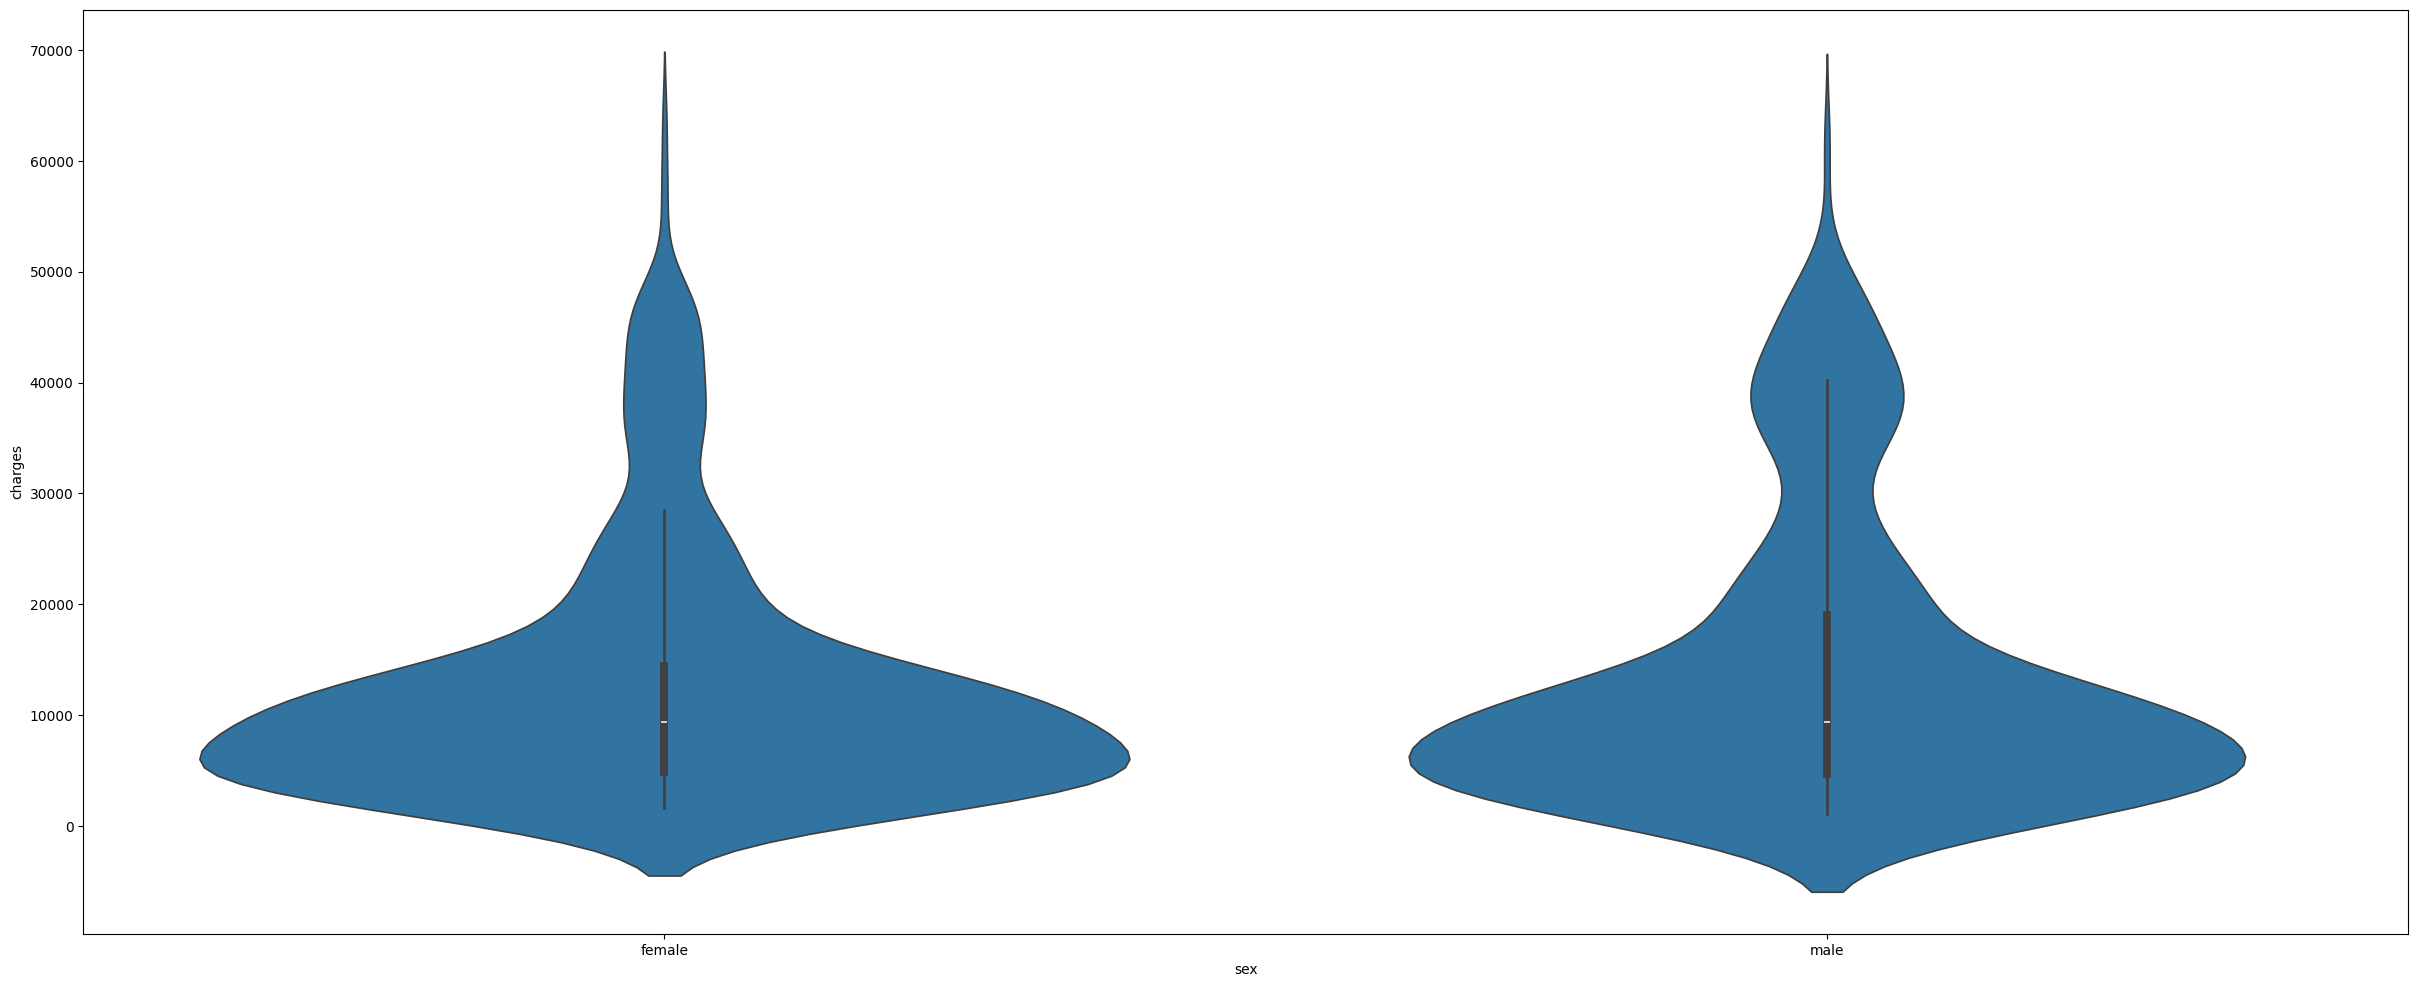

In [139]:
sns.violinplot(x="sex", y="charges", data = df)

- A small group of male pay higher insurance charges when compared with the female participants

<Axes: xlabel='age', ylabel='charges'>

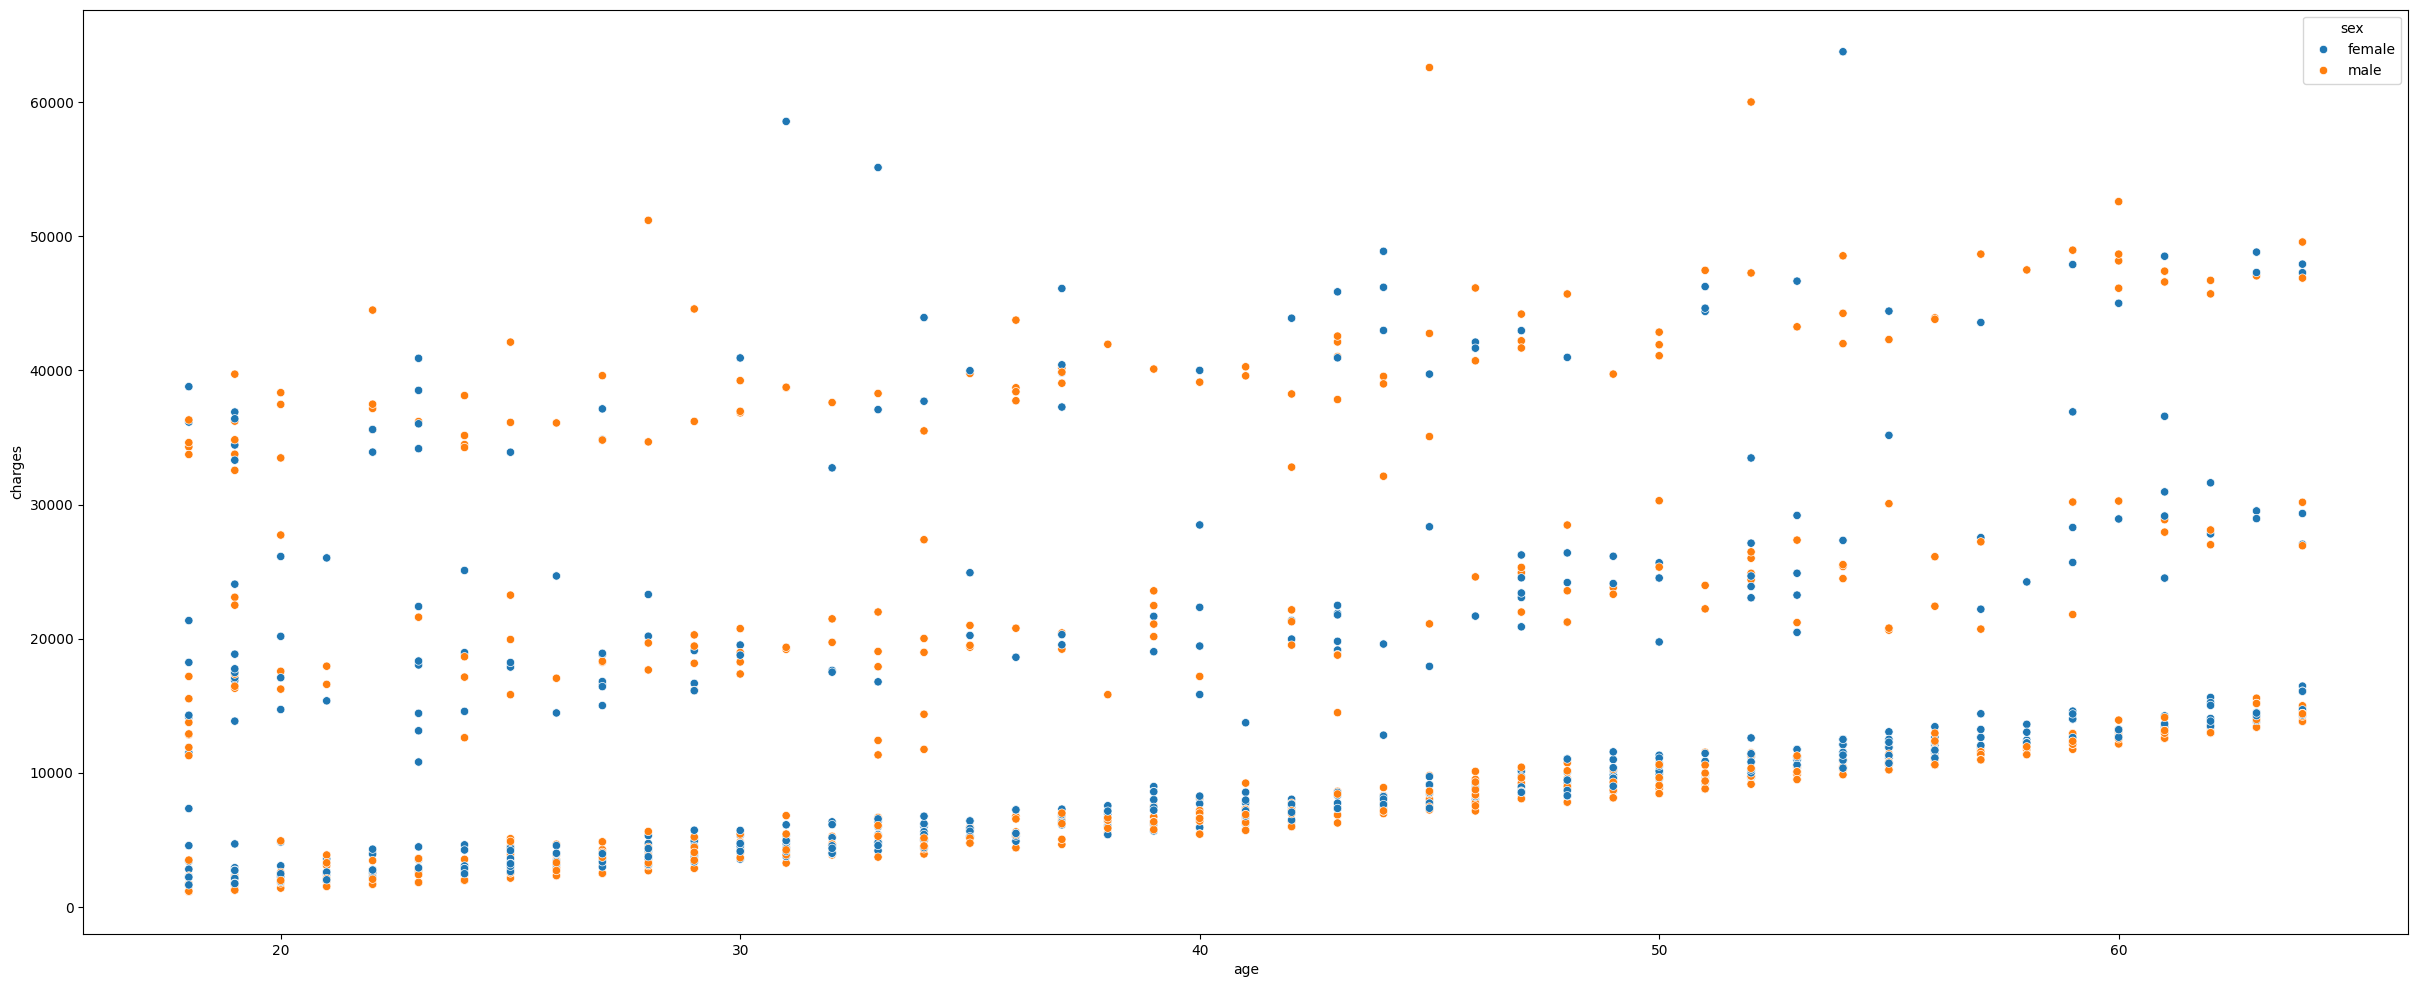

In [140]:
sns.scatterplot(data=df, x="age", y="charges", hue="sex")

- The minimum insurance charge increases with increase in age
- A clear three linearly increasing relation is identified, which might indicate that the dataset includes people with three different range of monthly incomes. For example, the insurance charge for a higher income person at an early age is much higher than the low income person who is very old.

<Axes: xlabel='smoker', ylabel='count'>

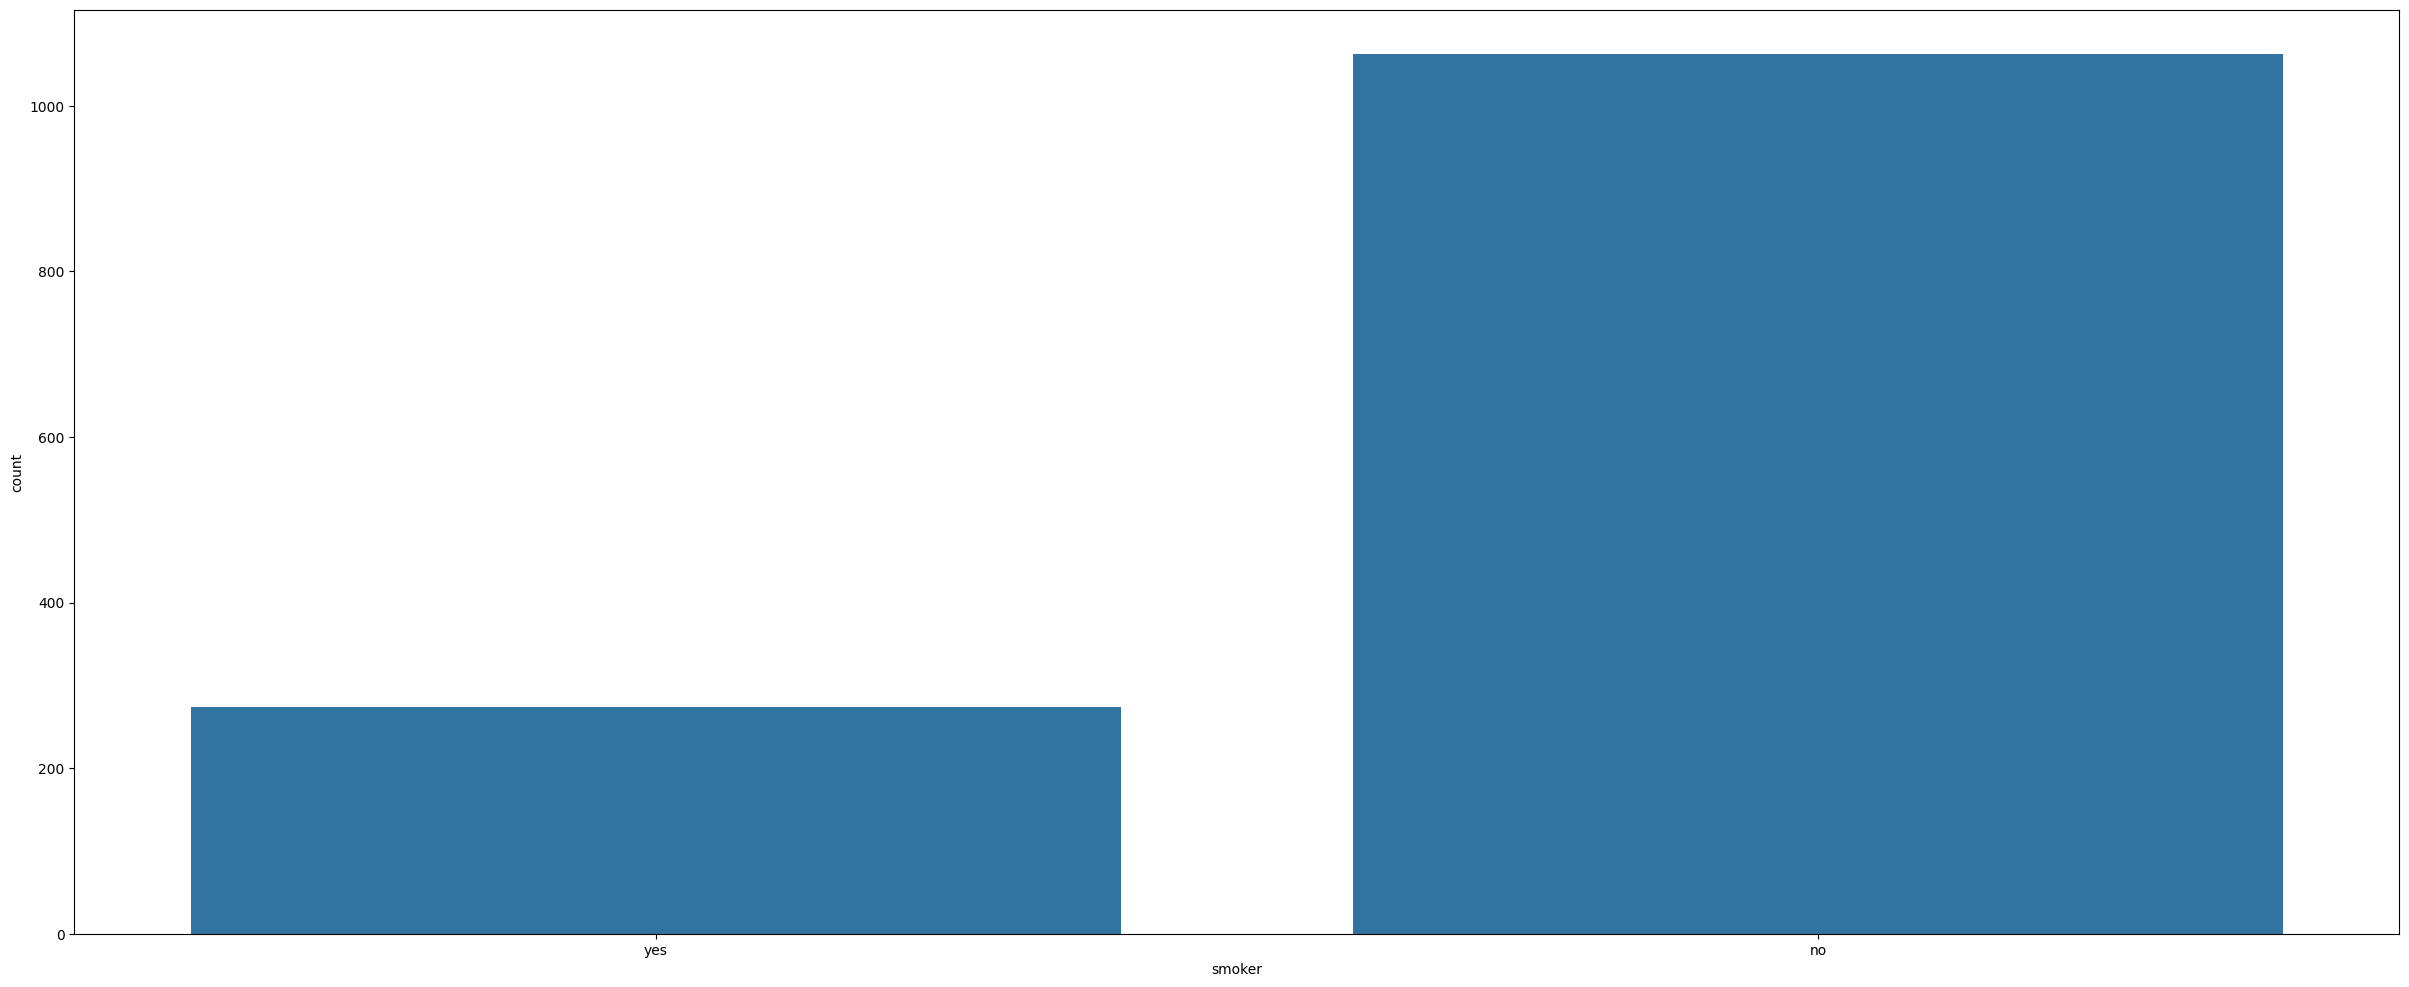

In [141]:
sns.countplot(df, x="smoker")

- Major number of participants does not smoke

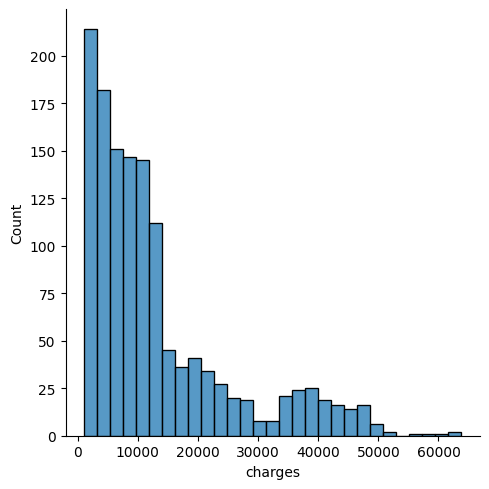

In [142]:
sns.displot(data=df, x="charges")

- The histogram plot of the insurnace charges shows that the amount is right skewed.
- we can either keep this outlier or remove it using box plot before training in our model 

<h3>But which category among them pay huge amount of insurance?</h3>

In [143]:
high_pay_df = df.loc[df['charges']>20000]
high_pay_df.shape

(273, 7)

In [144]:
low_pay_df = df.loc[df['charges']<20000]
low_pay_df.shape

(1064, 7)

In [145]:
high_pay_df['charges'].mean()

np.float64(33985.10967915751)

In [146]:
low_pay_df['charges'].mean()

np.float64(7966.400832000942)

In [147]:
int(high_pay_df['charges'].mean()/low_pay_df['charges'].mean())

4

- The average insurance paid by 273 people is 4 times higher than the average insurance paid by 1064 people

In [148]:
high_pay_df['children'].mean()

np.float64(1.1355311355311355)

In [149]:
low_pay_df['children'].mean()

np.float64(1.0855263157894737)

In [150]:
low_pay_df['age'].mean()

np.float64(38.391917293233085)

In [151]:
high_pay_df['age'].mean()

np.float64(42.45787545787546)

- One of the reason could be that rich business people who are with a mean age of 42 are paying more insurance 
- Since there are no direct influence or proper reason for the presence of this outlier, we can remove those rows

In [152]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

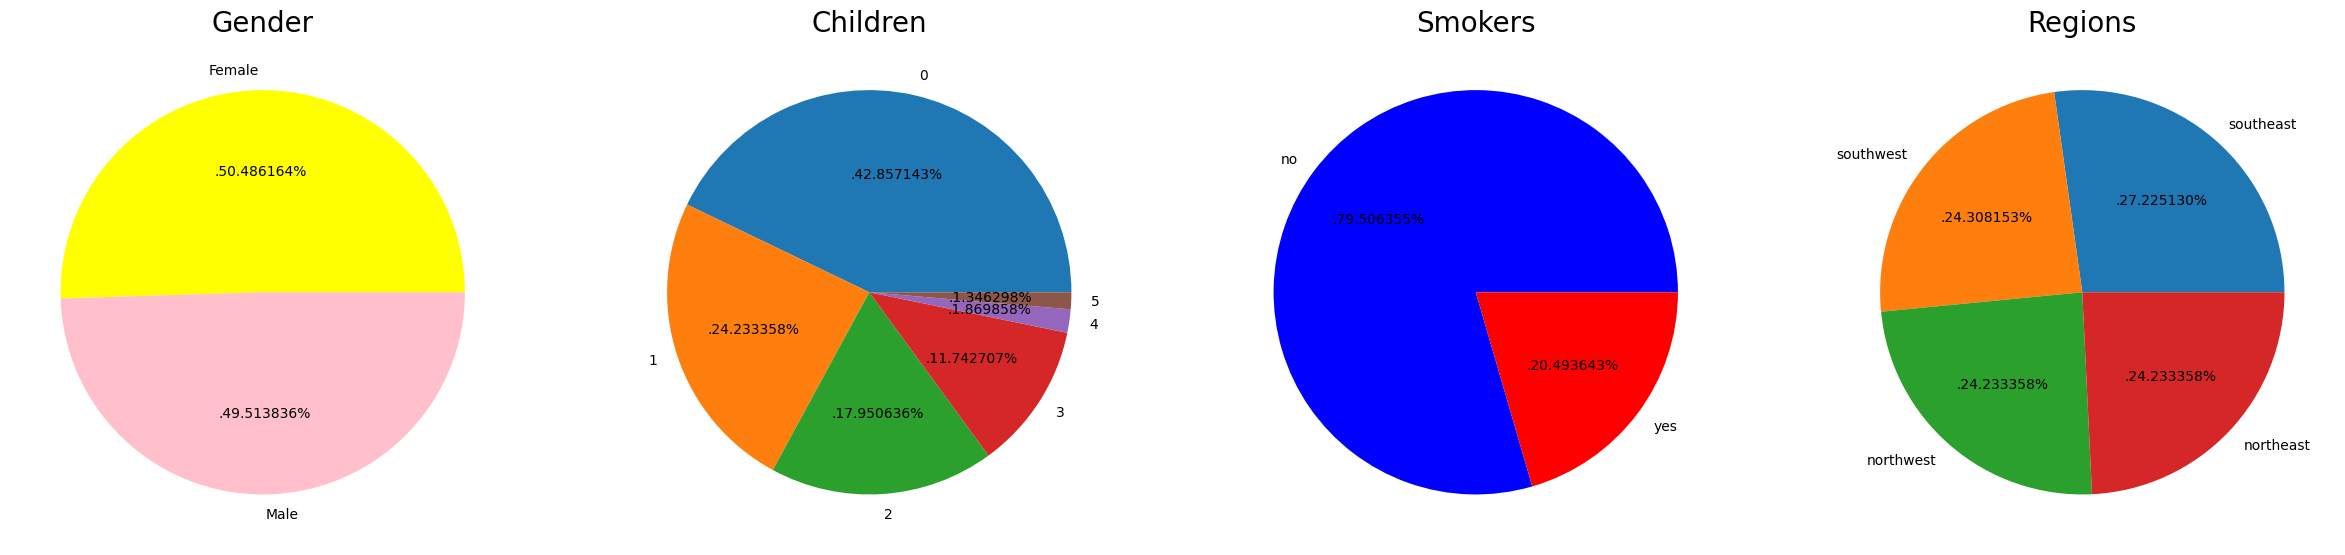

In [153]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 4, 1)
size =df['sex'].value_counts()
labels = 'Female', 'Male'
color = ['yellow', 'pink']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 2)
size =df['children'].value_counts()
labels = '0', '1','2','3','4','5'
color = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('Children', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 3)
size =df['smoker'].value_counts()
labels = 'no', 'yes'
color = ['blue', 'red']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Smokers', fontsize = 20)
plt.axis('off')


plt.subplot(1, 4, 4)
size =df['region'].value_counts()
labels = 'southeast', 'southwest','northwest','northeast'
color = ['red', 'green']
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('Regions', fontsize = 20)
plt.axis('off')

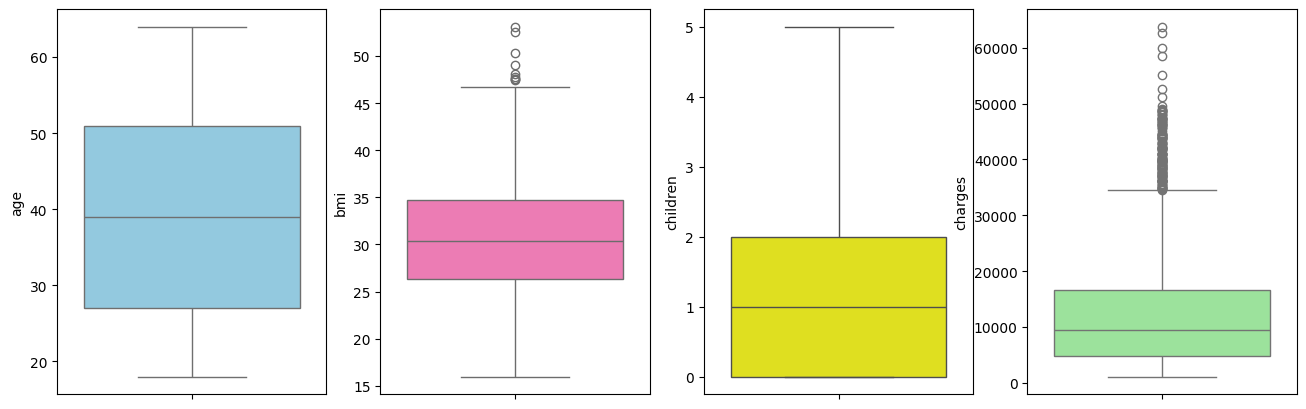

In [154]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['age'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['bmi'], color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df['children'], color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df['charges'], color='lightgreen')
plt.show()

- The insurance amount column has outliers, which is represented by the positively/right skewed box plot.
- Few of the data has been positively skewed in bmi feature.

In [155]:
# Sorting data
data = np.sort(df['charges'])

# Calculating Q1, Q2 (median), Q3
Q1 = np.percentile(data, 25)
Q2 = np.median(data)
Q3 = np.percentile(data, 75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculating lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Filtering outliers
outliers = data[(data < lower_whisker) | (data > upper_whisker)]

# Calculating min and max values within whiskers
min_value = data[data >= lower_whisker].min()
max_value = data[data <= upper_whisker].max()

# Printing results
print(f"Minimum (within whiskers): {min_value}")
print(f"Q1 (First Quartile): {Q1}")
print(f"Median (Q2): {Q2}")
print(f"Q3 (Third Quartile): {Q3}")
print(f"Maximum (within whiskers): {max_value}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")
#print(f"Outliers: {outliers}")

Minimum (within whiskers): 1121.8739
Q1 (First Quartile): 4746.344
Median (Q2): 9386.1613
Q3 (Third Quartile): 16657.71745
Maximum (within whiskers): 34472.841
Interquartile Range (IQR): 11911.37345
Lower Whisker: -13120.716174999998
Upper Whisker: 34524.777625


In [156]:
# taking a value slighlty higher than the third quartile 

out = df[df['charges']>20000]

In [157]:
final_df = df.drop(out.index)
final_df.shape

(1064, 7)

In [158]:
df.shape

(1337, 7)

## 5. Data Pre-processing

In [159]:
X = final_df.drop(columns=['charges'], axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.90,0,yes,southwest
1,18,male,33.77,1,no,southeast
2,28,male,33.00,3,no,southeast
4,32,male,28.88,0,no,northwest
5,31,female,25.74,0,no,southeast


In [160]:
y = final_df['charges']
y

0       16884.9240
1        1725.5523
2        4449.4620
4        3866.8552
5        3756.6216
           ...    
1332    11411.6850
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
Name: charges, Length: 1064, dtype: float64

In [161]:
# Create Column Transformer for categorical and numerical features

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([("OneHotEncoder", cat_transformer, cat_features),("StandardScaler", numeric_transformer, num_features),])



In [162]:
X = preprocessor.fit_transform(X)

In [163]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [164]:
X_train.shape, y_train.shape

((851, 11), (851,))

In [165]:
X_test.shape, y_test.shape

((213, 11), (213,))

## 6. Model and Metric Selection

In [166]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [167]:
models = {
"Linear Regression": LinearRegression(),
"Lasso": Lasso (),
"Ridge": Ridge(),
"K-Neighbors Regressor": KNeighborsRegressor(),
"Decision Tree": DecisionTreeRegressor(),
"Random Forest Regressor": RandomForestRegressor(),
"XGB Regressor": XGBRegressor(),
"AdaBoost Regressor": AdaBoostRegressor()
}
#"CatBoosting Regressor": CatBoostRegressor (verbose=False),

In [168]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score (true, predicted)
    
    return mae, rmse, r2_square

## 7. Model Training and Evaluation

In [169]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)                  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print (list (models.keys())[i])
    model_list.append(list (models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)


    print('='*35)
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2182.5407
- Mean Absolute Error: 1048.2757
- R2 Score: 0.7840
------------------------------
Model performance for Test set
- Root Mean Squared Error: 2435.3187
- Mean Absolute Error: 1140.5816
- R2 Score: 0.7371


Lasso
Model performance for Training set
- Root Mean Squared Error: 2182.3274
- Mean Absolute Error: 1049.4673
- R2 Score: 0.7840
------------------------------
Model performance for Test set
- Root Mean Squared Error: 2436.5678
- Mean Absolute Error: 1141.9154
- R2 Score: 0.7368


Ridge
Model performance for Training set
- Root Mean Squared Error: 2182.5996
- Mean Absolute Error: 1054.4836
- R2 Score: 0.7840
------------------------------
Model performance for Test set
- Root Mean Squared Error: 2434.8311
- Mean Absolute Error: 1145.3951
- R2 Score: 0.7372


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2156.9163
- Mean Absolute Error: 1177.6362
- R2 Score: 

## RESULTS

In [170]:
pd.DataFrame(list(zip (model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.737205
0,Linear Regression,0.737099
1,Lasso,0.736830
5,Random Forest Regressor,0.720446
6,XGB Regressor,0.683719
3,K-Neighbors Regressor,0.652221
7,AdaBoost Regressor,0.539073
4,Decision Tree,0.505726


### Linear Regression - selected as the best model

In [171]:
lin_model = LinearRegression (fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score (y_test, y_pred) *100

print(" Accuracy of the model is %.2f" % score)

 Accuracy of the model is 73.71


Text(0, 0.5, 'Predicted')

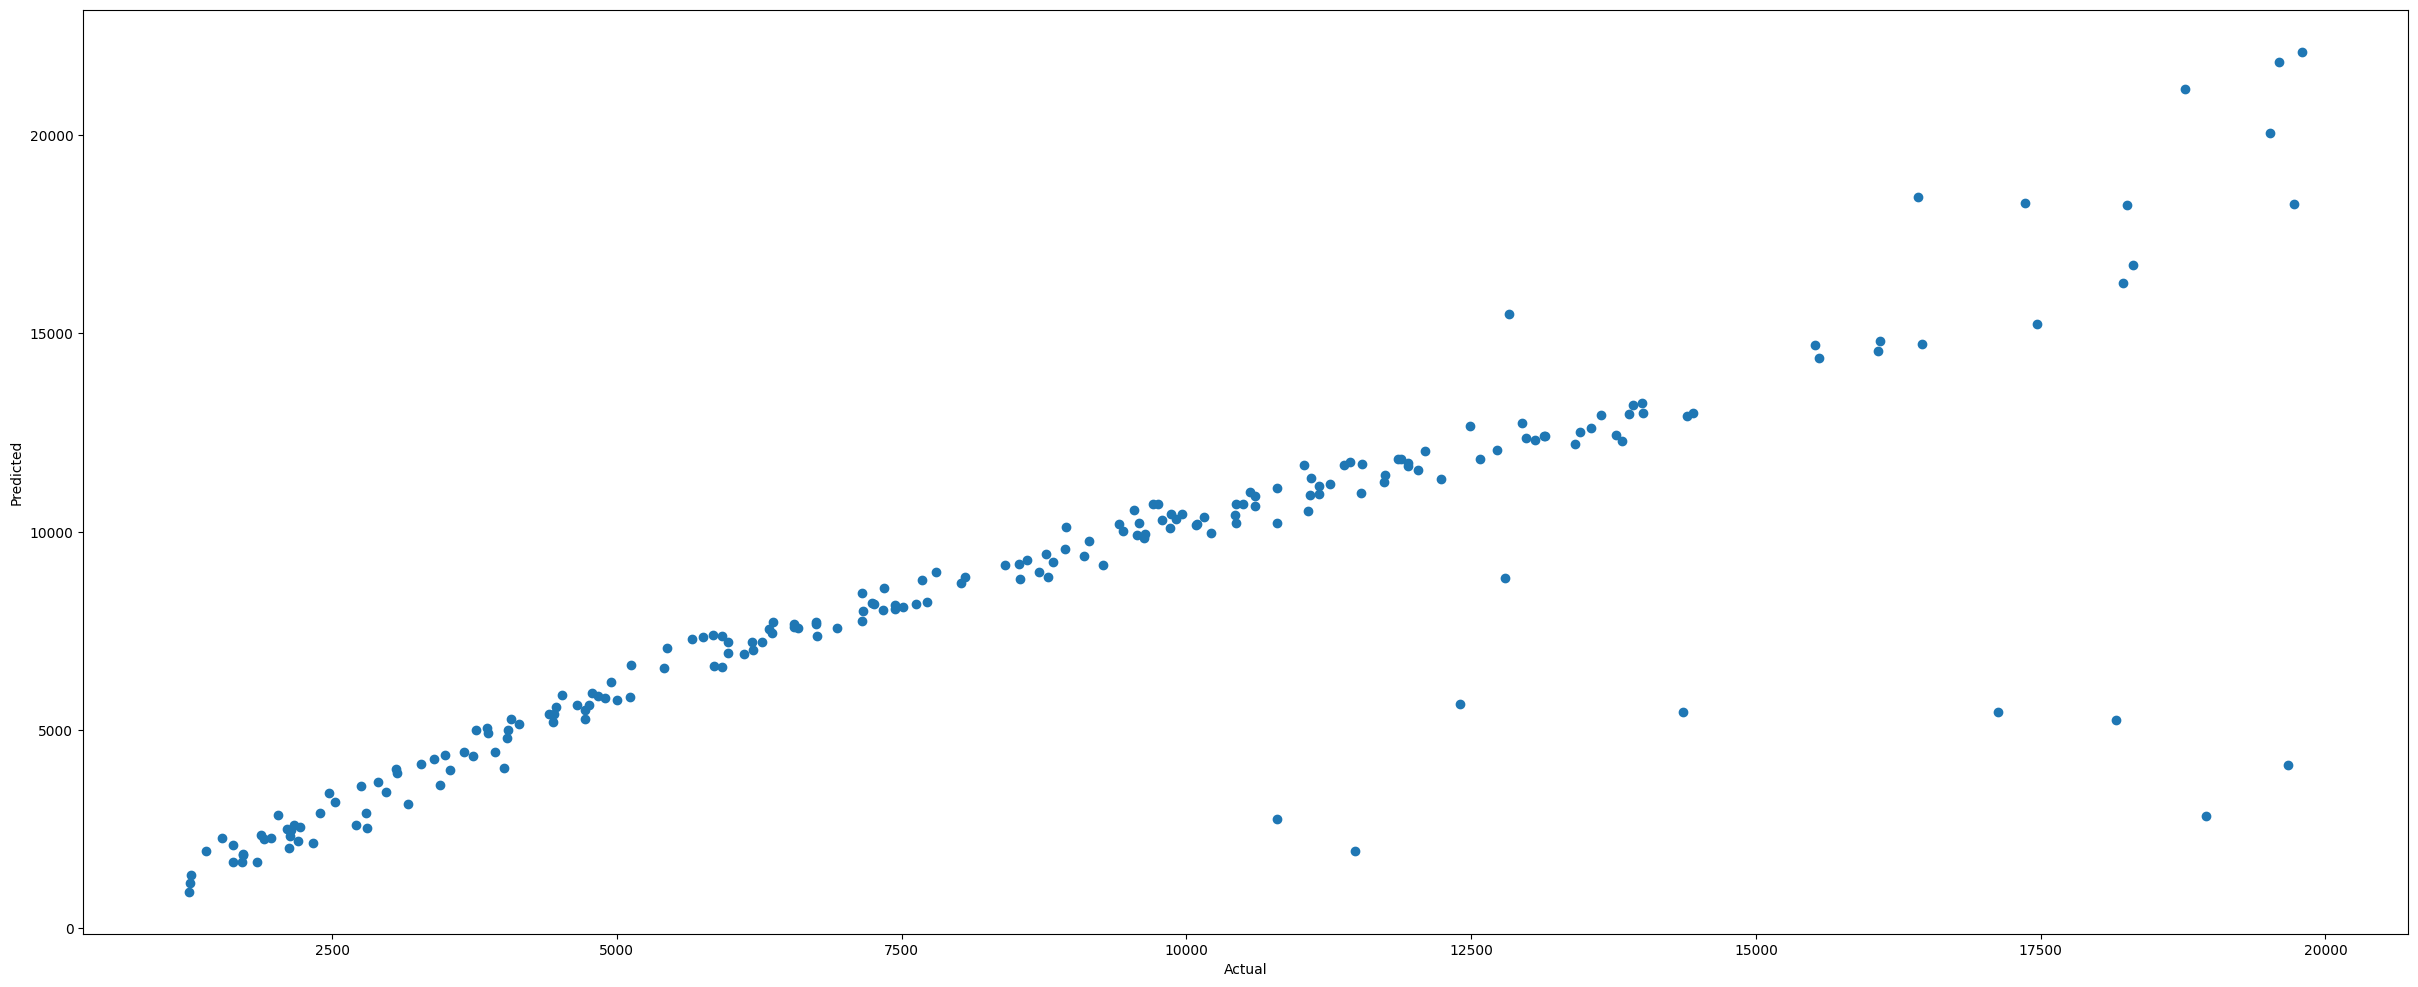

In [172]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='charges'>

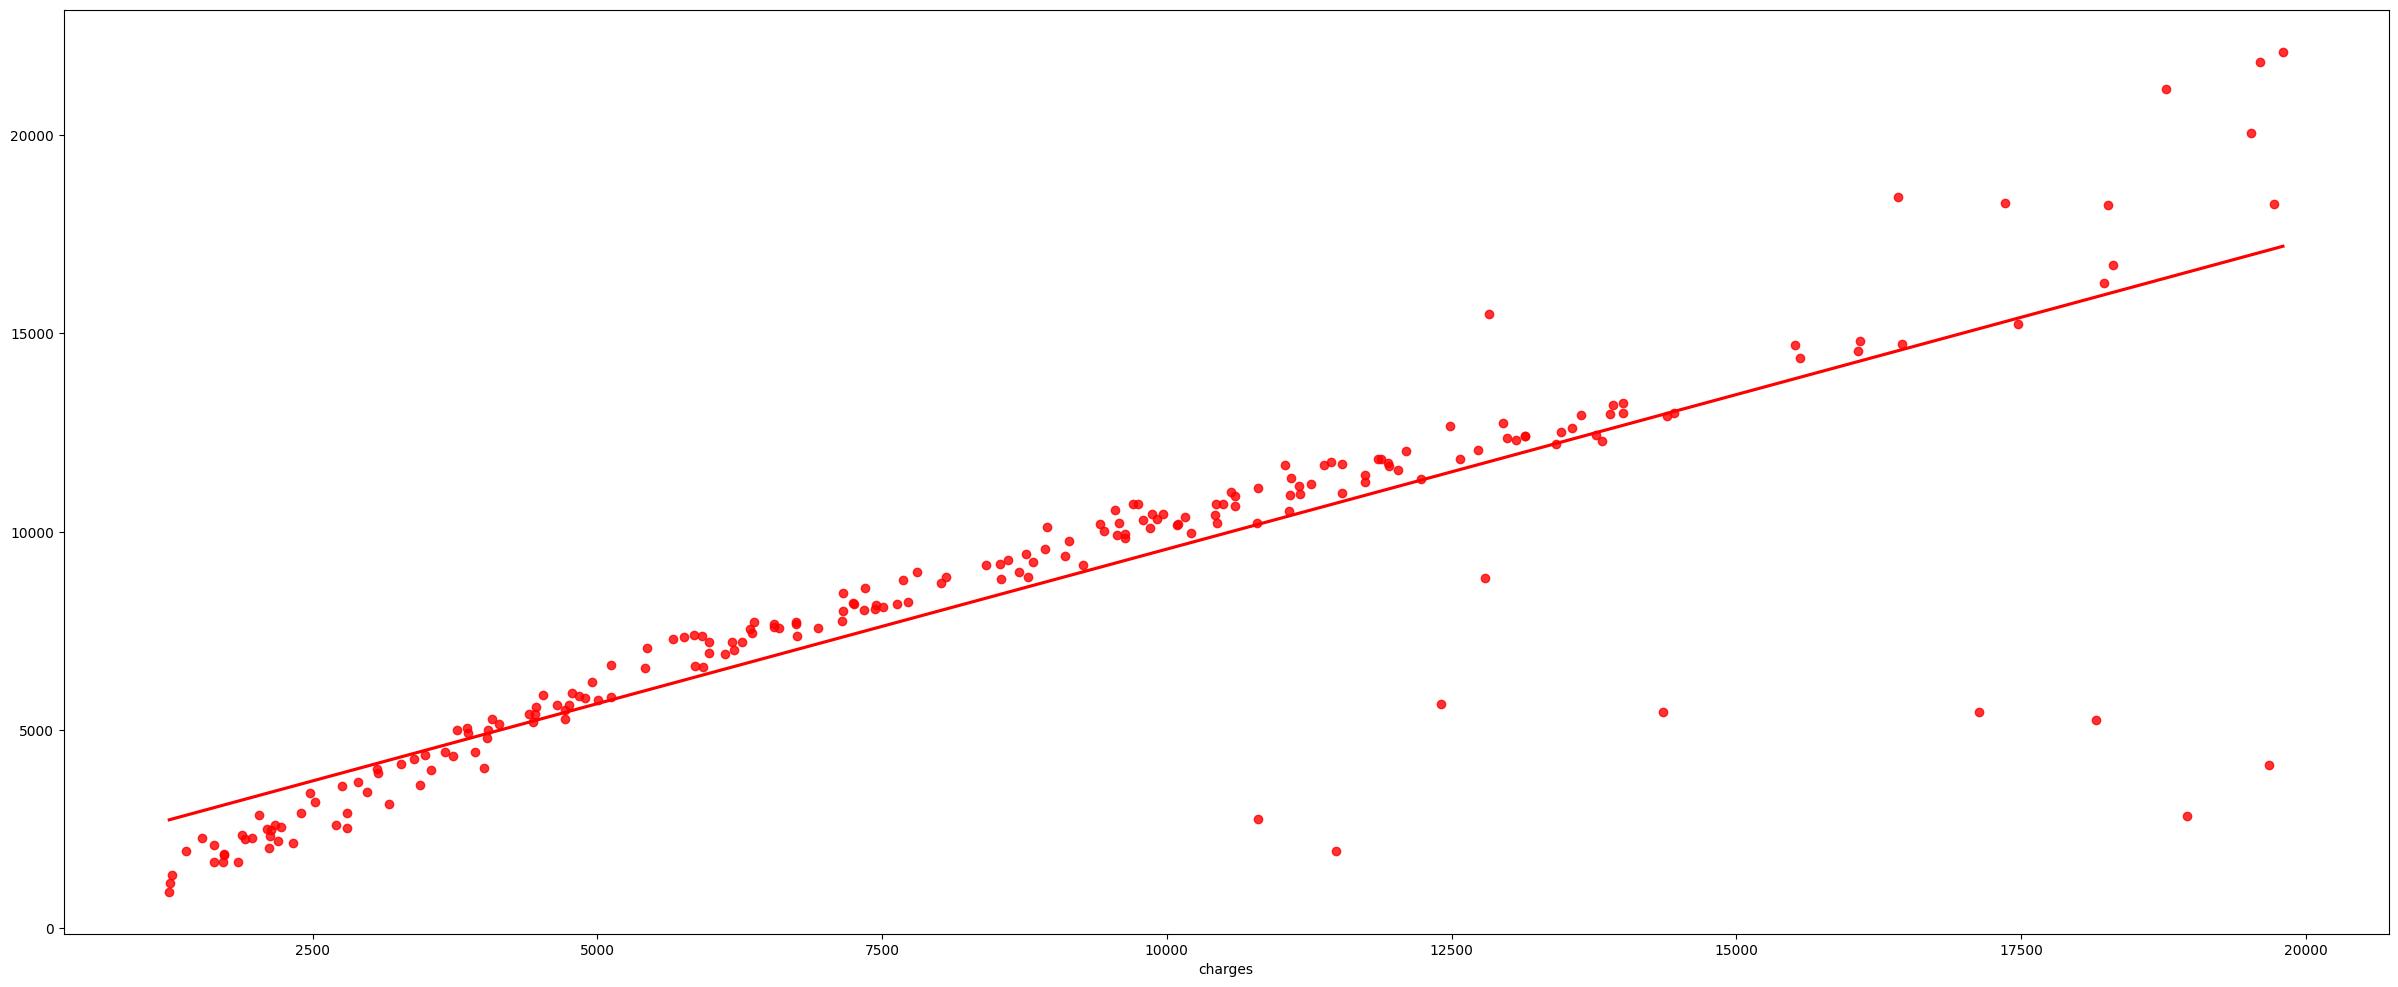

In [173]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [174]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
42,6272.47720,7214.0,-941.52280
1325,13143.33665,12414.0,729.33665
525,11482.63485,1952.0,9530.63485
932,10096.97000,10190.0,-93.03000
994,16420.49455,18436.0,-2015.50545
...,...,...,...
735,9583.89330,10214.0,-630.10670
74,7726.85400,8232.0,-505.14600
157,15518.18025,14714.0,804.18025
1261,3277.16100,4138.0,-860.83900
